In [6]:
import numpy as np
import pandas as pd

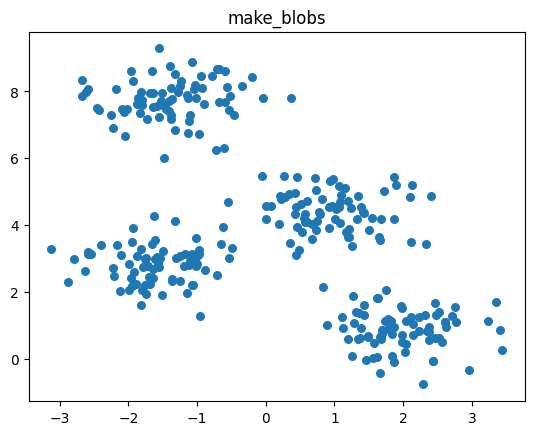

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 가우시안 분포 군집
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("make_blobs")
plt.show()

In [15]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

df

,x1,x2,y
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,0
298,0.369479,7.791105,3


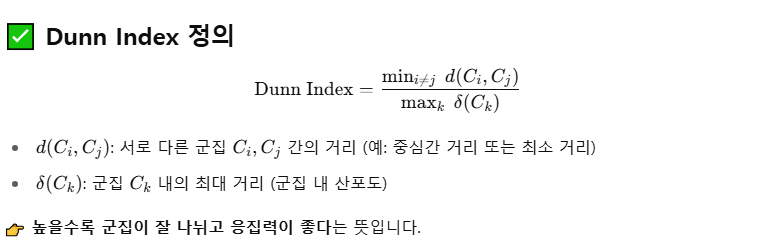

In [51]:
from scipy.spatial.distance import cdist

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    n_clusters = len(unique_clusters)

    # 각 군집에 해당하는 점들 모으기
    clusters = [X[labels == k] for k in unique_clusters]

    # 군집 내 최대 거리 (분모)
    intra_dists = [np.max(cdist(cluster, cluster)) for cluster in clusters]
    max_intra = np.max(intra_dists)

    # 군집 간 최소 거리 (분자)
    inter_dists = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            dist = np.min(cdist(clusters[i], clusters[j]))
            inter_dists.append(dist)
    min_inter = np.min(inter_dists)
    
    print(min_inter)

    return min_inter / max_intra

In [26]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=1234)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [52]:
dunn = dunn_index(X, km.labels_)

dunn

0.6627467983924322


0.2023142747772717

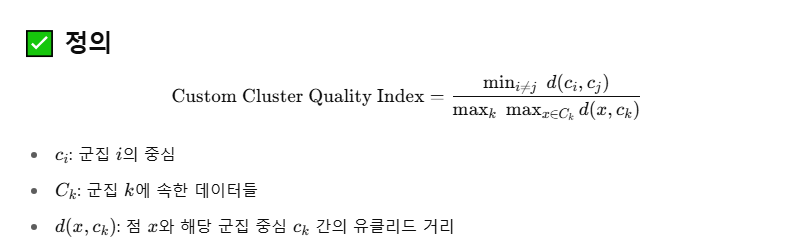

In [37]:
df['label'] = km.labels_

In [38]:
# n_cluster개 군집의 중심
km.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

In [40]:
# n_cluster개 군집의 중심 manual
for k in range(4):
    print(df[df['label'] == k][['x1', 'x2']].mean())

x1   -1.584385
x2    2.830813
dtype: float64
x1   -1.373244
x2    7.753689
dtype: float64
x1    1.982583
x2    0.867713
dtype: float64
x1    0.949735
x2    4.419069
dtype: float64


In [45]:
n = 4

list_max = []
centers = []
for k in range(n):
    center = df[df['label'] == k][['x1', 'x2']].mean() # 군집의 중심
    centers.append(center)
    
    xkij = df[df['label'] == k][['x1', 'x2']]
    dist = np.sqrt(((xkij - center) ** 2).sum(axis=1)).max() # 군집의 중심과 해당 군집의 데이터들 간의 유클리드 거리
    
    list_max.append(dist)
    
list_max

[1.676884702413352, 1.749404377314398, 1.709430098535626, 1.703986089470638]

In [46]:
list_min = []
for k in range(n - 1):
    for j in range(k + 1, n):
        dist = np.sqrt(sum((centers[k] - centers[j]) ** 2)) # 군집의 중심들 간의 유클리드 거리
        list_min.append(dist)
        
list_min

[4.9274018794837895,
 4.0714882532498855,
 2.990706044734273,
 7.660171860528449,
 4.06397847270351,
 3.6985000745161805]

In [48]:
dunn_index = min(list_min) / max(list_max)
dunn_index

1.7095567402920657

In [55]:
from scipy.spatial.distance import euclidean

labels = km.labels_
centroids = km.cluster_centers_

# 분모: 각 군집 내에서 중심과 가장 멀리 떨어진 점의 거리 중 최대
max_intra = 0
for i, center in enumerate(centroids):
    members = X[labels == i]
    dists = [euclidean(center, x) for x in members]
    max_intra = max(max_intra, max(dists))

# 분자: 중심들 간 거리 중 가장 작은 값
min_inter = np.inf
for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
        dist = euclidean(centroids[i], centroids[j])
        min_inter = min(min_inter, dist)

# 계산
index_value = min_inter / max_intra
print("Custom Cluster Separation Index:", index_value)

Custom Cluster Separation Index: 1.7095567402920655
